In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [ ]:
Ek = (25/1) * math.log(4/155)
print("Potassium Nernst Potential:", Ek)
ENa = (25/1) * math.log(145/12)
print("Sodium Nernst Potential:", ENa)
ECa = (25/2) * math.log(1.5/(10**-4))
print("Calcium Nernst Potential:", ECa)
ECl = (25/-1) * math.log(120/4)
print("Chloride Nernst Potential:", ECl)

Potassium Nernst Potential: -91.4282688949839
Sodium Nernst Potential: 62.29567731581436
Calcium Nernst Potential: 120.19756850105435
Chloride Nernst Potential: -85.02993454155389


In [ ]:
Cm = 1**10-6            # uF/cm^2
gNa = 100**-3           # mS/cm^2

In [ ]:
# Question 2 GHK Equation
Vm = 25 * math.log((1.0*4 + 0.04*145 + 0.45*4)/(1.0*155 + 0.04*12 + 0.45*120))
print(Vm)

-72.3405792824742


In [ ]:
alpham = (0.182 * (Vm - (-35)))/ (1 - math.exp((-(Vm - (-35)))/9) )
betam = (-0.124 * (Vm - (-35)))/ (1 - math.exp(((Vm - (-35)))/9) )
m = (alpham)/(alpham + betam)

alphah = (0.024 * (Vm - (-50)))/ (1 - math.exp((-(Vm - (-50)))/5) )
betah = (-0.0091 * (Vm - (-75)))/ (1 - math.exp(((Vm - (-75)))/5) )

h = (alphah)/(alphah + betah)

alphan = (0.02 * (Vm - (20)))/ (1 - math.exp((-(Vm - (20)))/9) )
betan = (-0.002 * (Vm - (20)))/ (1 - math.exp(((Vm - (20)))/9) )

n = (alphan)/(alphan + betan)

print("m value:",m)
print("h value:", (1-h))
print("n value", n)

m value: 0.022637979270075076
h value: 0.847112676198803
n value 0.00034991186662768184


Peak Voltage: 60.69177725896674
Voltage:  -57


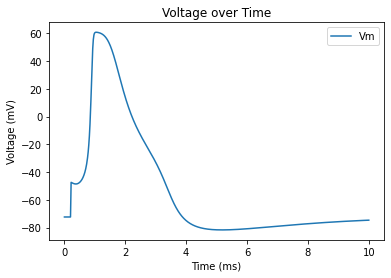

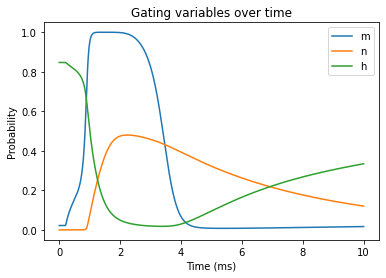

In [ ]:
dt = 0.01 # ms
VmList = []
VmList.append(Vm)
mList = []
mList.append(m)
nList = []
nList.append(n)
hList = []
hList.append(1-h)

'''
INa = 100 * m**3 * h * (Vm - ENa) # 100 mS/cm^2
Ik =  50 * n**4 * (Vm - Ek)       # 50 mS/cm^2
IL = 0.5*(Vm - (-72.5))
Im = 0
dVm = dt * (Im - INa - Ik - IL)/(1) # uF/cm^2

dm = dt * (alpham * (1 - m) - betam * m)
dn = dt * (alphan * (1 - n) - betan * n)
dh = dt * (alphah * (1 - h) - betah * h)
'''
Im = 0
time = np.arange(0, 10, dt)


for x in time:
  INa = 100 * m**3 * (1-h) * (Vm - ENa) # 100 mS/cm^2
  Ik =  50 * n**4 * (Vm - Ek)       # 50 mS/cm^2
  IL = 0.5*(Vm - (-72.5))
  if x == 0.20:
    Im = 1250 # uF/cm^2 Not right
  elif x == 0.22:
    Im = 0
  dVm = dt * (Im - INa - Ik - IL)/(1) # uF/cm^2 Not right
  Vm = Vm + dVm
  alpham = (0.182 * (Vm - (-35)))/ (1 - math.exp((-(Vm - (-35)))/9) )
  betam = (-0.124 * (Vm - (-35)))/ (1 - math.exp(((Vm - (-35)))/9) )

  alphah = (0.024 * (Vm - (-50)))/ (1 - math.exp((-(Vm - (-50)))/5) )
  betah = (-0.0091 * (Vm - (-75)))/ (1 - math.exp(((Vm - (-75)))/5) )

  alphan = (0.02 * (Vm - (20)))/ (1 - math.exp((-(Vm - (20)))/9) )
  betan = (-0.002 * (Vm - (20)))/ (1 - math.exp(((Vm - (20)))/9) )

  dm = dt * (alpham * (1 - m) - betam * m)
  m = m + dm
  dn = dt * (alphan * (1 - n) - betan * n)
  n = n + dn
  dh = dt * (alphah * (1 - h) - betah * h)
  h = h + dh

  VmList.append(Vm)
  mList.append(m)
  nList.append(n)
  hList.append(1-h)

time = np.arange(0, 10 + dt, dt)
plt.figure(0)
plt.plot(time, VmList)
plt.legend(["Vm"])
plt.title("Voltage over Time")
plt.ylabel("Voltage (mV)")
plt.xlabel("Time (ms)")

plt.figure(1)
plt.plot(time, mList)
plt.plot(time, nList)
plt.plot(time, hList)
plt.legend(['m','n','h'])
plt.title("Gating variables over time")
plt.ylabel("Probability")
plt.xlabel("Time (ms)")



print("Peak Voltage:",max(VmList))
print("Voltage: ", -57)


1. Threshold happens at 800 uF / cm^2 although higher amplitudes would make it spike faster.




2. 
Rm = 40000 ohm-cm^2
Ra = 200 ohm-cm
d = 3 um
r = 1.5 um

lambda = sqrt((a * Rm)/(2 * Ra))
lambda = sqrt((0.0003 cm * 40000 ohm-cm^2)/(2 * 200 ohm-cm))
lambda = 0.173205

(-57--72.5) = (60--72.5)*e^(-x/0.173). 
x = 0.3712 cm 

